Let’s try using what we’ve learned to render a simple 3D shape called an octahedron. 

Whereas a cube has six faces, all of which are squares, an octahedron has eight faces, all of which are triangles. You can think of an octahedron as two, four-sided pyramids stacked on top of each other. 

<img src="https://merriam-webster.com/assets/mw/static/art/dict/octahedr.gif"/>

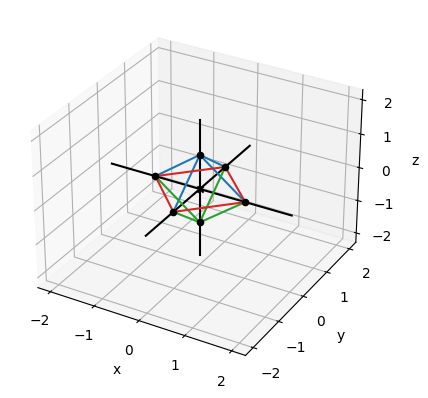

In [2]:
import sys
sys.path.insert(0,'..')
import numpy as np
from vectors import *;
from draw3d import *;
from draw2d import *;
from math import *;
from matplotlib import cm;

options = [1,-1]
points = []
segments = []

for x in options:
    point = (x,0,0)
    points.append(point)
for y in options:
    point = (0,y,0)
    points.append(point)
for z in options:
    point = (0,0,z)
    points.append(point)

top_segments = [
    Segment3D((1,0,0), (0,0,1)),
    Segment3D((0,1,0), (0,0,1)),
    Segment3D((-1,0,0), (0,0,1)),
    Segment3D((0,-1,0), (0,0,1))
]

bottom_segments = [
    Segment3D((1,0,0), (0,0,-1), color=green),
    Segment3D((0,1,0), (0,0,-1), color=green),
    Segment3D((-1,0,0), (0,0,-1), color=green),
    Segment3D((0,-1,0), (0,0,-1), color=green)
]

middle_segments = [
    Segment3D((1,0,0), (0,1,0), color=red),
    Segment3D((0,1,0), (-1,0,0), color=red),
    Segment3D((-1,0,0), (0,-1,0), color=red),
    Segment3D((0,-1,0), (1,0,0), color=red),
]

draw3d(
    Points3D(*points),
    *top_segments,
    *bottom_segments,
    *middle_segments
)

In [ ]:
# example of a face made via three vectors

v1 = (0,0,1)
v2 = (-1,0,0)
v3 = (0,-1,0)

# (v2-v1) x (v3-v1)
from_v1_to_v2 = subtract(v2, v1)
from_v1_to_v3 = subtract(v3, v1)

print(from_v1_to_v2, from_v1_to_v3)

area_side = length(cross(from_v1_to_v2,from_v1_to_v3))

draw3d(
    Points3D(*[v1,v2,v3]),
    Arrow3D(v1, color=red),
    Arrow3D(v2, color=blue),
    Arrow3D(v3, color=green),
    Arrow3D(v2, tail=v1, color=orange),
    Arrow3D(v3, tail=v1, color=gray)
)

print(area_side)

In [11]:
octahedron = [
    [(1,0,0), (0,1,0), (0,0,1)],
    [(1,0,0), (0,0,-1), (0,1,0)],
    [(1,0,0), (0,0,1), (0,-1,0)],
    [(1,0,0), (0,-1,0), (0,0,-1)],
    [(-1,0,0), (0,0,1), (0,1,0)],
    [(-1,0,0), (0,1,0), (0,0,-1)],
    [(-1,0,0), (0,-1,0), (0,0,1)],
    [(-1,0,0), (0,0,-1), (0,-1,0)],
]

def vertices(faces):
    return list(set([vertex for face in faces for vertex in face]))

vertices(octahedron)

[(0, 1, 0), (0, -1, 0), (1, 0, 0), (-1, 0, 0), (0, 0, -1), (0, 0, 1)]

To turn 3D points into 2D points, we must choose what 3D direction we are observing from.
Once we have two 3D vectors defining “up” and “right” from our perspective, we can project
any 3D vector onto them and get two components instead of three. The component function
extracts the part of any 3D vector pointing in a given direction using the dot product:
def component(v,direction):
return (dot(v,direction) / length(direction))

2.0 2.0 (2.0, 2.0)


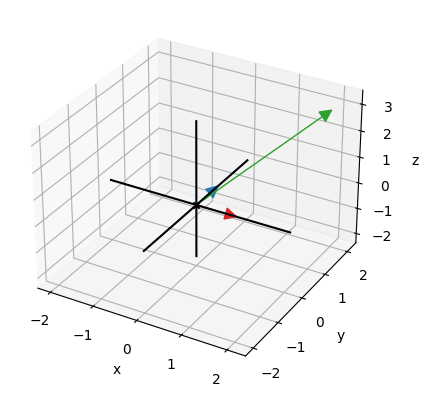

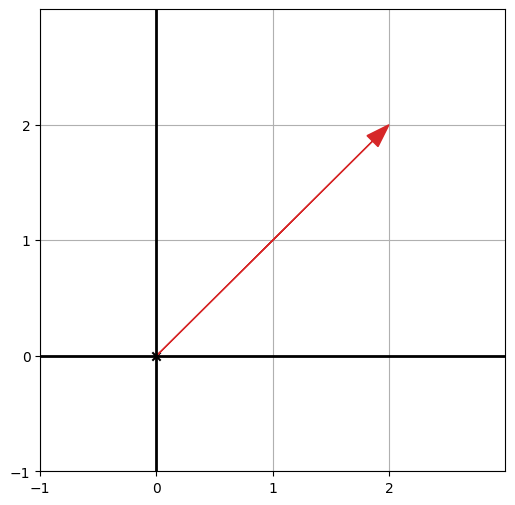

In [12]:
#  1: define 2 3d vectors as up and right 
# this alows us to project any 3d component on to it
# and get two instead of three components

right = (1,0,0)
up = (0,1,0)

u = (2,2,3)


def component(v,direction):
    """extract part of 3d vector pointing in a given direction via dot product"""
    return (dot(v,direction) / length(direction))

def vector_to_2d(v):
    return (component(v,right), component(v,up))

comp_right = component(u, right)
comp_up = component(u, up)
u_2d = vector_to_2d(u)

print(comp_right, comp_up, u_2d)

draw3d(
    Arrow3D(right, color=red),
    Arrow3D(up, color=blue),
    Arrow3D(u, color=green),
)

draw2d(
    Arrow2D(u_2d, color=red),
)



[[(1.0, 0.0), (0.0, 1.0), (0.0, 0.0)], [(1.0, 0.0), (0.0, 0.0), (0.0, 1.0)], [(1.0, 0.0), (0.0, 0.0), (0.0, -1.0)], [(1.0, 0.0), (0.0, -1.0), (0.0, 0.0)], [(-1.0, 0.0), (0.0, 0.0), (0.0, 1.0)], [(-1.0, 0.0), (0.0, 1.0), (0.0, 0.0)], [(-1.0, 0.0), (0.0, -1.0), (0.0, 0.0)], [(-1.0, 0.0), (0.0, 0.0), (0.0, -1.0)]]


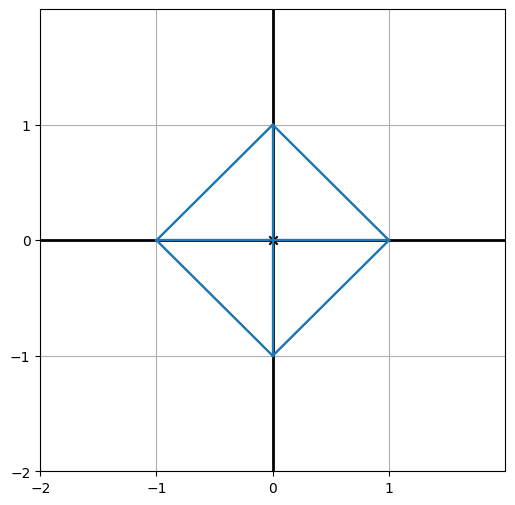

In [13]:
def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]


octahedron_2d = [face_to_2d(face) for face in octahedron]
print(octahedron_2d)

polygons = [Polygon2D(*face) for face in octahedron_2d]


draw2d(
    *polygons
)


To shade 2D drawing => color triangle given a light source. 

Let’s say our light source lies at a vector of (1, 2, 3) from the origin. 

brightness of a triangular face is --- determined by:
- how close to perpendicular it is to the light.
- to measure by how aligned a perpendicular vector to the face is with the light source

(alignement = dot product)
(perpendicular = cross product)


=> Our task is to find a number from 0 to 1 that indicates how bright a face should be.

- Given a vector perpendicular (or normal) to each face and a vector pointing to the light source (acquired via the cross product)
- the dot product tells us how aligned the light source and perpendicular vector are.

Moreover, because we’re only considering directions, we can choose vectors with length 1. Then, if the face is pointing toward the blight
source at all, the dot product will lie between 0 and 1. If it is further than 90° from the light source, it will not be illuminated at all. 

In [ ]:
light_source = (1, 2, 3)



draw3d(
    Points3D(*points),
    *top_segments,
    *bottom_segments,
    *middle_segments,
    Arrow3D(light_source, color=purple)
)

In [7]:
def unit(v):
    ''' This helper function takes a vector and returns another in the same direction but with length 1'''
    return scale(1./length(v), v)

def normal(face):
    '''This helper function takes a face and gives us a vector perpendicular to it:'''
    from_0_to_1 = subtract(face[1], face[0])
    from_0_to_2 = subtract(face[2], face[0])
    return(cross(from_0_to_1, from_0_to_2))

Putting it all together, we have a function that draws all the triangles we need to render a 3D
shape using our draw function. (I’ve renamed draw to draw2d and renamed the classes
accordingly to distinguish them from their 3D counterparts.)

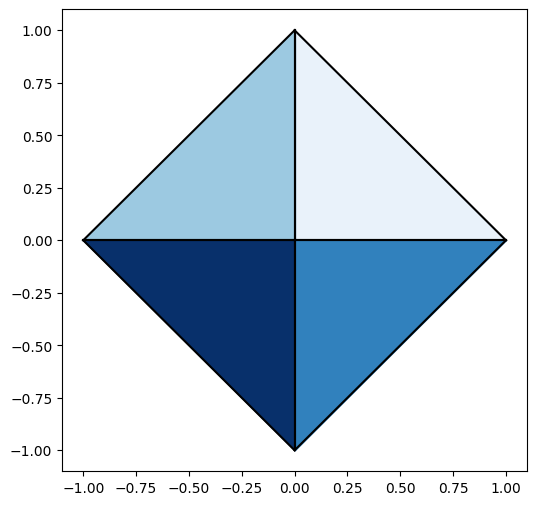

In [14]:
blues = cm.get_cmap('Blues')



def createTriangles(faces, light_source=(1,2,3), color_map=blues, lines=None):
    polygons = []
    for face in faces:
        unit_normal = unit(normal(face)) 
        #1 For each face, computes a vector of length 1 perpendicular to it
        if unit_normal[2] > 0: 
            #2 Only proceeds if the z component of this vector is positive, 
            #or in other words, if it points toward the viewer

            lightness = dot(unit(normal(face)),unit(light_source))
            # higher lightness = less shading (more aligned with lighting)

            # higher number less shade 
            c = color_map(1 - lightness)
            #3 The larger the dot product between the normal vector and the light source vector, the less shading
            p = Polygon2D(*face_to_2d(face),  fill=c, color=lines) 
            #4 Specifies an optional lines argument for the edges of each triangle, 
            # revealing the skeleton of the shape we’re drawing
            polygons.append(p)

    return polygons


draw2d(*createTriangles(octahedron, color_map=blues, lines=black),axes=False, origin=False, grid=None)





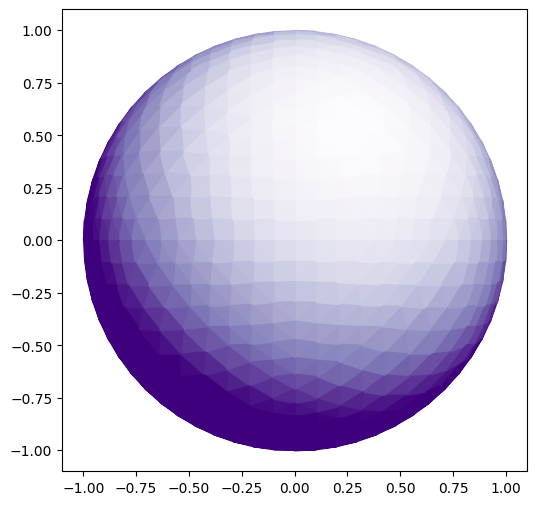

In [22]:
def split(face):
    midpoints = [unit(add(face[i], face[(i+1)%len(face)])) for i in range(0,len(face))]
    triangles = [(face[i], midpoints[i], midpoints[(i-1)%len(face)]) for i in range(0,len(face))]
    return [midpoints] + triangles

def rec_split(faces, depth=0):
    if depth == 0:
        return faces
    else:
        return rec_split([new_face for face in faces for new_face in split(face)], depth-1)

# NICE SPHERE!
def sphere_approx(n):
    return rec_split(octahedron,n)


draw2d(*createTriangles(sphere_approx(4), color_map=cm.get_cmap("Purples"), lines=None),axes=False, origin=False, grid=None)
